## Image Classification with Convolutional Neural Networks (CNN)

In this notebook, we build an end-to-end Convolutional Neural Network (CNN)
to classify images from the Fashion-MNIST dataset using TensorFlow and Keras.

This notebook is designed for:
- Learning CNN fundamentals
- Understanding the complete ML pipeline
- Building a clean, reproducible deep learning project


## Install & Import Dependencies

In [27]:
# Core Libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import math
import logging
import sys
import os

# Configuration
tfds.disable_progress_bar()
tf.get_logger().setLevel(logging.ERROR)

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.19.0


## Load Fashion-MNIST Dataset

In [28]:
dataset, metadata = tfds.load(
    'fashion_mnist',
    as_supervised=True,
    with_info=True
)

train_dataset, test_dataset = dataset['train'], dataset['test']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples  = metadata.splits['test'].num_examples

print("Training samples:", num_train_examples)
print("Test samples:", num_test_examples)


Training samples: 60000
Test samples: 10000


## Class Labels

In [29]:
CLASS_NAMES = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]


## Data Preprocessing

In [30]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.expand_dims(image, -1)  # Add channel dimension
    return image, label

train_dataset = train_dataset.map(normalize)
test_dataset  = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset  = test_dataset.cache()


## Data Visualization

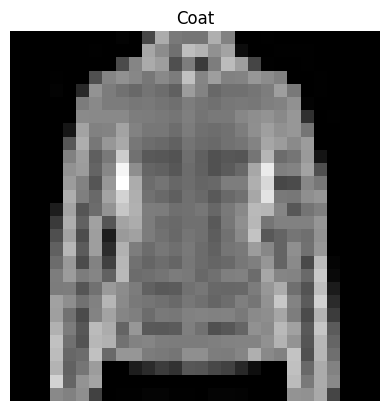

In [31]:
for image, label in test_dataset.take(1):
    sample_image = image.numpy().reshape(28, 28)

plt.imshow(sample_image, cmap='gray')
plt.title(CLASS_NAMES[label])
plt.axis('off')
plt.show()


## Multiple Images

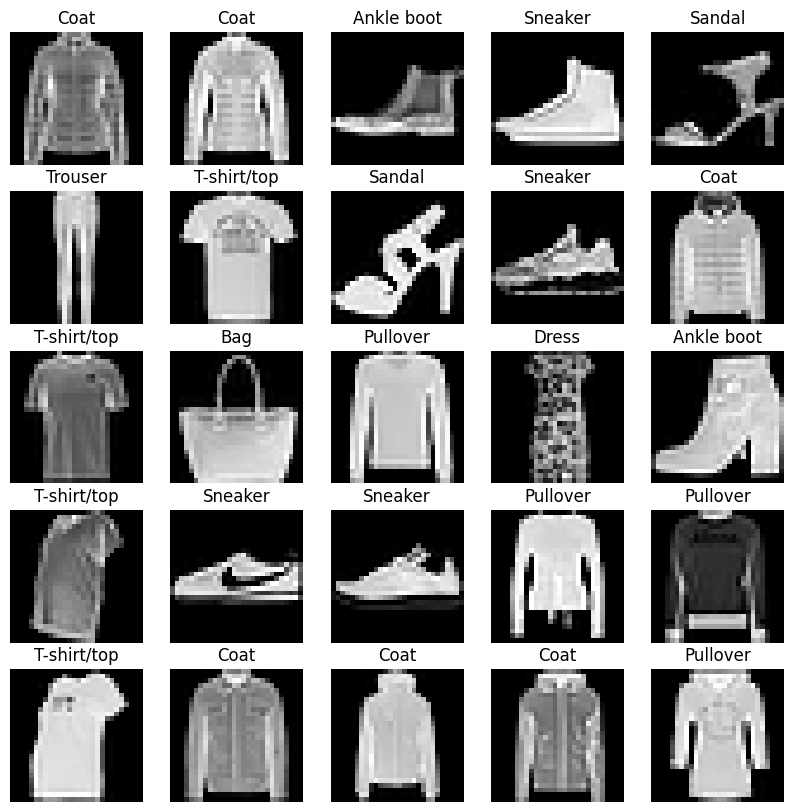

In [32]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(test_dataset.take(25)):
    plt.subplot(5,5,i+1)
    plt.imshow(image.numpy().reshape(28,28), cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')
plt.show()


## Build CNN Model

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


## Model Summary

In [34]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


## Training Pipeline

In [36]:
BATCH_SIZE = 32

train_dataset = (
    train_dataset
    .shuffle(num_train_examples)
    .batch(BATCH_SIZE)
    .repeat()
)

test_dataset = test_dataset.batch(BATCH_SIZE)


In [38]:
history = model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE)
)

model.save("model/cnn_fashion_mnist.keras")
print("Model saved successfully!")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9799 - loss: 0.0563
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0482
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0351
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0310
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9904 - loss: 0.0275
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0279
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9923 - loss: 0.0220
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9923 - loss: 0.0226
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9927 - loss: 0.0230
Model saved successfully!


## Model Evaluation

In [39]:
test_loss, test_accuracy = model.evaluate(
    test_dataset,
    steps=math.ceil(num_test_examples / BATCH_SIZE)
)

print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9135 - loss: 0.5867
Test Accuracy: 0.9165


## Predictions & Visualization

In [40]:
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


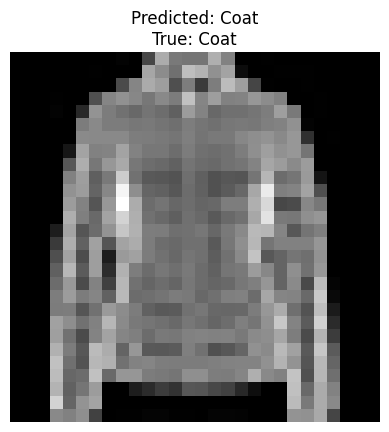

In [41]:
def plot_prediction(index):
    plt.imshow(images[index].numpy().reshape(28,28), cmap='gray')
    plt.title(
        f"Predicted: {class_names[np.argmax(predictions[index])]}\n"
        f"True: {class_names[labels[index]]}"
    )
    plt.axis('off')

plot_prediction(0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


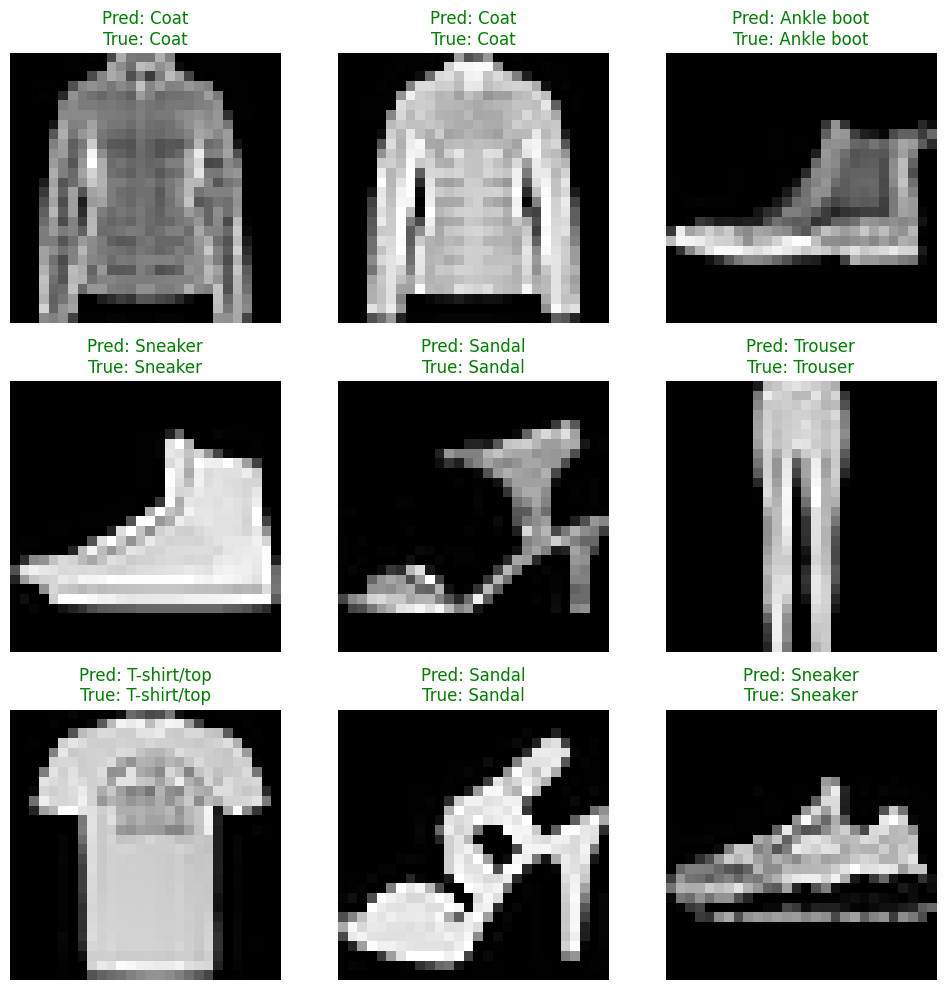

In [46]:
os.makedirs("assets", exist_ok=True)


for images, labels in test_dataset.take(1):
    predictions = model.predict(images)

plt.figure(figsize=(10,10))
for i in range(9):
    img = images[i].numpy().reshape(28,28)
    true_label = CLASS_NAMES[int(labels[i])]
    pred_label = CLASS_NAMES[np.argmax(predictions[i])]
    color = "green" if true_label == pred_label else "red"

    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.savefig("assets/sample_predictions.png", dpi=200)
plt.show()

## Conclusion

- We built a complete CNN image classification pipeline
- Used TensorFlow Datasets for clean data handling
- Achieved high accuracy on Fashion-MNIST
- Notebook is modular, readable, and reusable

Next Steps:
- Add Data Augmentation
- Convert to Production-ready API
- Train on RGB datasets (CIFAR-10)
